# Poker Hand Dataset Analysis using Dimensionality Reduction

This notebook demonstrates various dimensionality reduction techniques on the Poker Hand dataset and creates visualizations including density distribution plots for each technique.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from dim_reduction_utils import DimensionalityReduction, EvaluationMetrics

# Set the style for plots
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('viridis')

# Seed for reproducibility
np.random.seed(42)

## Load and Preprocess Data

In [2]:
# Load the dataset
data = pd.read_csv('Hill_Valley_Dataset/poker-hand-training-true.data', header=None)

# Set column names
columns = ['S1', 'C1', 'S2', 'C2', 'S3', 'C3', 'S4', 'C4', 'S5', 'C5', 'class']
data.columns = columns

# Create a more balanced sample for better visualization
balanced_data = pd.DataFrame()

# Sample from each class with a maximum limit per class
for class_label in range(10):  # 10 poker hand classes
    class_data = data[data['class'] == class_label]
    # For rare classes, take all instances; for common classes, limit to 500
    if len(class_data) <= 500:
        sampled = class_data
    else:
        sampled = class_data.sample(n=500, random_state=42)
    balanced_data = pd.concat([balanced_data, sampled])

# Shuffle the balanced dataset
balanced_data = balanced_data.sample(frac=1, random_state=42).reset_index(drop=True)

# Separate features and target
X = balanced_data.drop('class', axis=1).values
y = balanced_data['class'].values

# Display basic information
print(f"Original dataset shape: {data.shape}")
print(f"Balanced dataset shape: {balanced_data.shape}")
print("\nClass distribution in balanced dataset:")
print(balanced_data['class'].value_counts().sort_index())

# Display sample of the data
print("\nSample of the balanced data:")
print(balanced_data.head())

Original dataset shape: (25010, 11)
Balanced dataset shape: (2199, 11)

Class distribution in balanced dataset:
class
0    500
1    500
2    500
3    500
4     93
5     54
6     36
7      6
8      5
9      5
Name: count, dtype: int64

Sample of the balanced data:
   S1  C1  S2  C2  S3  C3  S4  C4  S5  C5  class
0   3   8   4   9   3  12   2   1   2  11      0
1   2   7   1   6   3   7   3   6   3   2      2
2   4  10   1   9   4   7   2  13   4   1      0
3   3   1   1   1   2   6   4   3   4   1      3
4   2   4   4   1   1  12   2   5   2  11      0


## Define Visualization Functions

In [3]:
# Function to plot density distributions
def plot_density_distribution(X_reduced, y, title):
    plt.figure(figsize=(15, 6))
    
    # First component density
    plt.subplot(1, 2, 1)
    for i in range(10):  # 10 poker hand classes
        if np.sum(y == i) > 0:  # Only plot classes that exist in the data
            sns.kdeplot(X_reduced[y == i, 0], label=f'Class {i}', fill=True, alpha=0.3)
    plt.title(f'{title} - Component 1 Density')
    plt.xlabel('Component 1')
    plt.ylabel('Density')
    plt.legend()
    
    # Second component density (if available)
    if X_reduced.shape[1] > 1:
        plt.subplot(1, 2, 2)
        for i in range(10):  # 10 poker hand classes
            if np.sum(y == i) > 0:  # Only plot classes that exist in the data
                sns.kdeplot(X_reduced[y == i, 1], label=f'Class {i}', fill=True, alpha=0.3)
        plt.title(f'{title} - Component 2 Density')
        plt.xlabel('Component 2')
        plt.ylabel('Density')
        plt.legend()
    
    plt.tight_layout()
    plt.show()

# Initialize dimensionality reduction and evaluation
dr = DimensionalityReduction(n_components=2, random_state=42)
metrics = EvaluationMetrics(k=5)

## 1. Principal Component Analysis (PCA)

PCA Metrics:
Trustworthiness: 0.6711
Continuity: 0.8302
KNN Accuracy: 0.2886
Silhouette Score: -0.3174


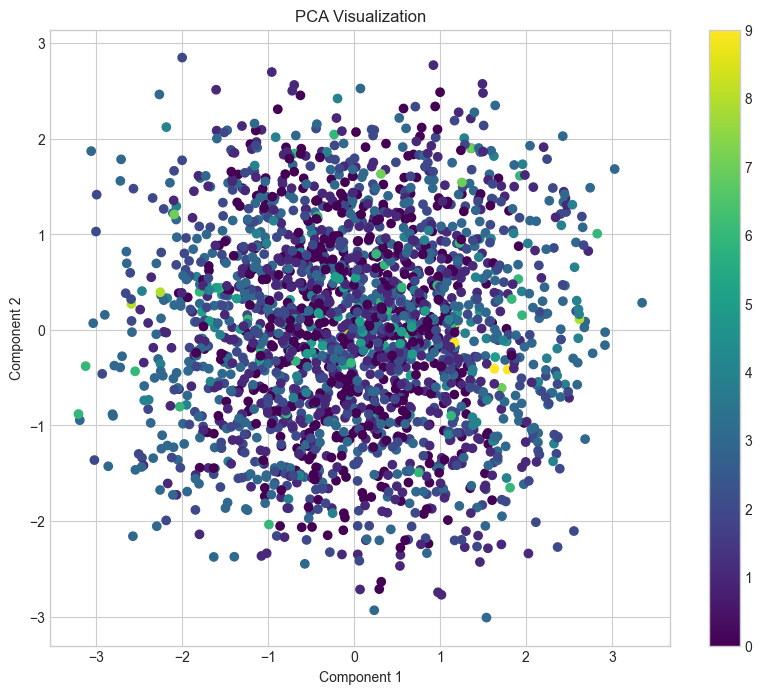

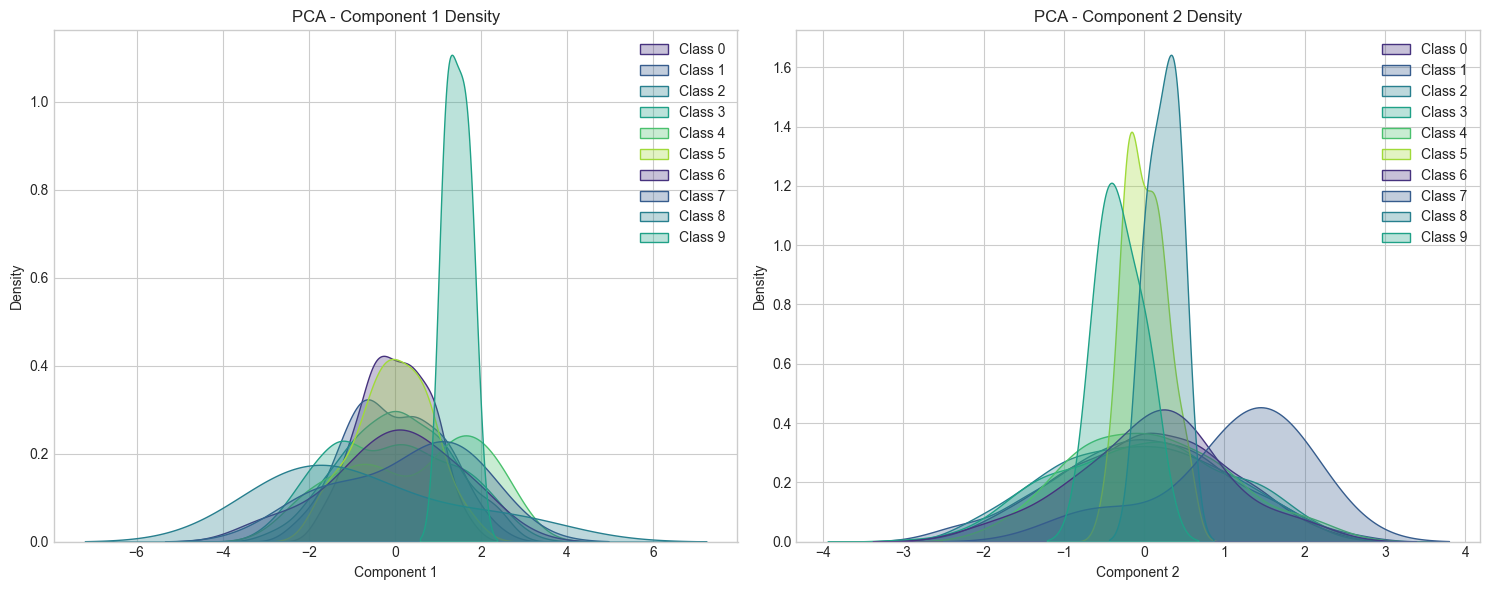

In [4]:
# Apply PCA
X_pca = dr.pca(X)

# Evaluate PCA
trust_pca = metrics.trustworthiness(X, X_pca)
cont_pca = metrics.continuity(X, X_pca)
knn_acc_pca = metrics.knn_accuracy(X_pca, y)
sil_score_pca = metrics.silhouette_score(X_pca, y)

print(f"PCA Metrics:")
print(f"Trustworthiness: {trust_pca:.4f}")
print(f"Continuity: {cont_pca:.4f}")
print(f"KNN Accuracy: {knn_acc_pca:.4f}")
print(f"Silhouette Score: {sil_score_pca:.4f}")

# Visualize PCA results
metrics.visualize(X_pca, y, title="PCA Visualization")

# Plot density distribution
plot_density_distribution(X_pca, y, "PCA")

## 2. Linear Discriminant Analysis (LDA)

LDA Metrics:
Trustworthiness: 0.6805
Continuity: 0.8218
KNN Accuracy: 0.2386
Silhouette Score: -0.2342


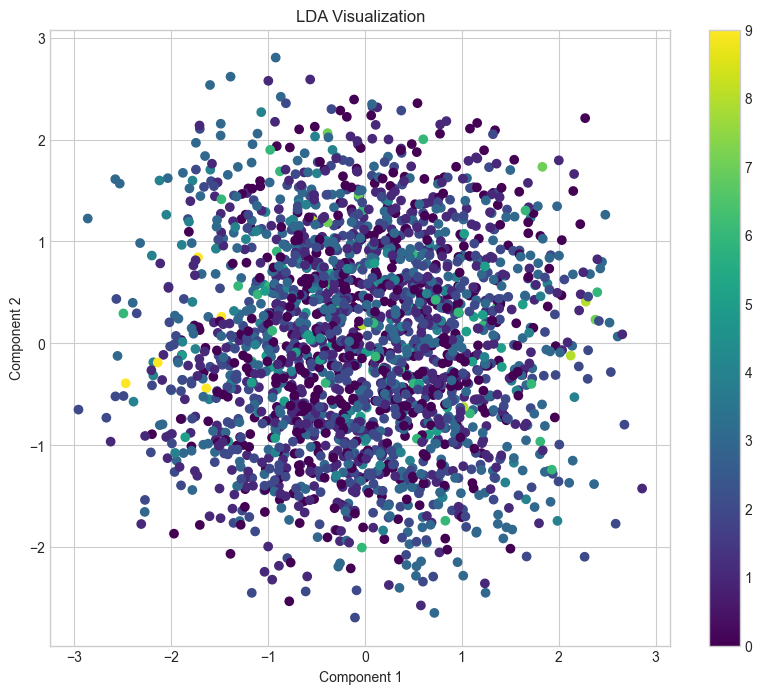

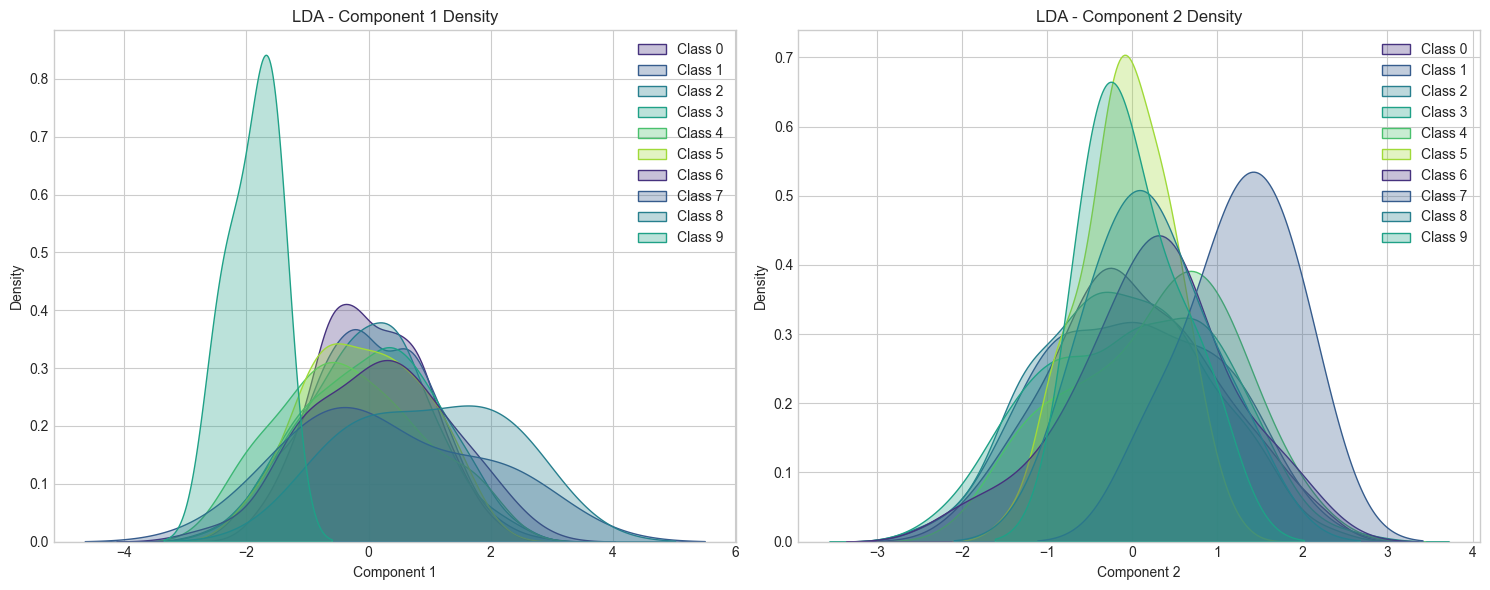

In [5]:
# Apply LDA - For multi-class classification, n_components can be up to min(n_classes-1, n_features)
# Poker dataset has 10 classes, so max components is 9
dr_lda = DimensionalityReduction(n_components=2, random_state=42)
X_lda = dr_lda.lda(X, y)

# Evaluate LDA
trust_lda = metrics.trustworthiness(X, X_lda)
cont_lda = metrics.continuity(X, X_lda)
knn_acc_lda = metrics.knn_accuracy(X_lda, y)
sil_score_lda = metrics.silhouette_score(X_lda, y)

print(f"LDA Metrics:")
print(f"Trustworthiness: {trust_lda:.4f}")
print(f"Continuity: {cont_lda:.4f}")
print(f"KNN Accuracy: {knn_acc_lda:.4f}")
print(f"Silhouette Score: {sil_score_lda:.4f}")

# Visualize LDA results
metrics.visualize(X_lda, y, title="LDA Visualization")

# Plot density distribution
plot_density_distribution(X_lda, y, "LDA")

## 3. t-Distributed Stochastic Neighbor Embedding (t-SNE)

c:\Users\LapTop\AppData\Local\Programs\Python\Python310\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\LapTop\AppData\Local\Programs\Python\Python310\lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
  File "c:\Users\LapTop\AppData\Local\Programs\Python\Python310\lib\subprocess.py", line 503, in run
    with Popen(*popenargs, **kwargs) as process:
  File "c:\Users\LapTop\AppData\Local\Programs\Python\Python310\lib\subprocess.py", line 971, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\LapTop\AppData\Local\Programs\Python\Python310\lib

t-SNE Metrics:
Trustworthiness: 0.9534
Continuity: 0.7972
KNN Accuracy: 0.2409
Silhouette Score: -0.2086


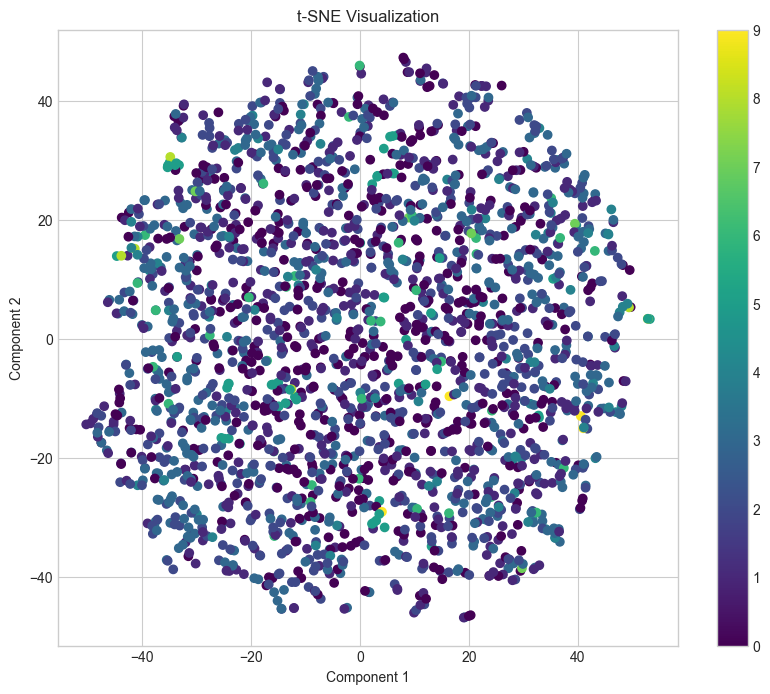

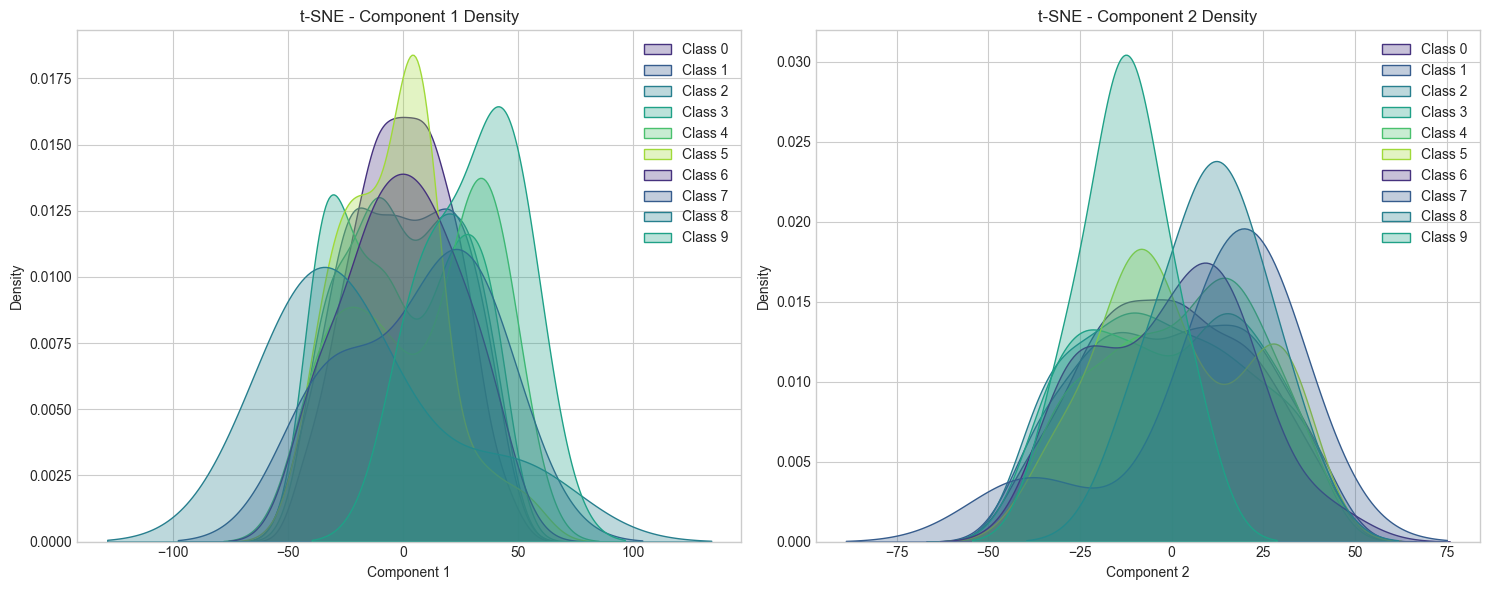

In [6]:
# Apply t-SNE
X_tsne = dr.tsne(X, perplexity=30)

# Evaluate t-SNE
trust_tsne = metrics.trustworthiness(X, X_tsne)
cont_tsne = metrics.continuity(X, X_tsne)
knn_acc_tsne = metrics.knn_accuracy(X_tsne, y)
sil_score_tsne = metrics.silhouette_score(X_tsne, y)

print(f"t-SNE Metrics:")
print(f"Trustworthiness: {trust_tsne:.4f}")
print(f"Continuity: {cont_tsne:.4f}")
print(f"KNN Accuracy: {knn_acc_tsne:.4f}")
print(f"Silhouette Score: {sil_score_tsne:.4f}")

# Visualize t-SNE results
metrics.visualize(X_tsne, y, title="t-SNE Visualization")

# Plot density distribution
plot_density_distribution(X_tsne, y, "t-SNE")

## 4. Multidimensional Scaling (MDS)

MDS Metrics:
Trustworthiness: 0.6929
Continuity: 0.8210
KNN Accuracy: 0.2545
Silhouette Score: -0.2249


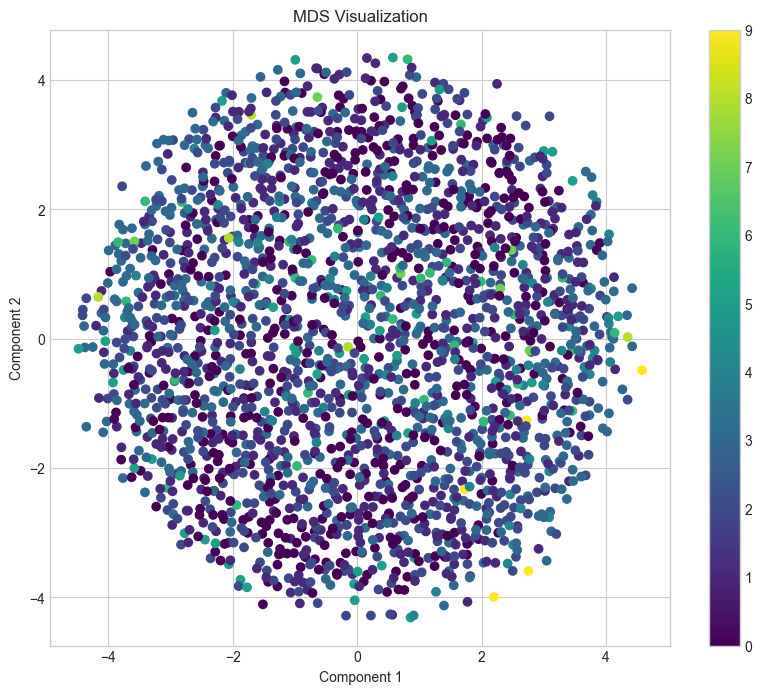

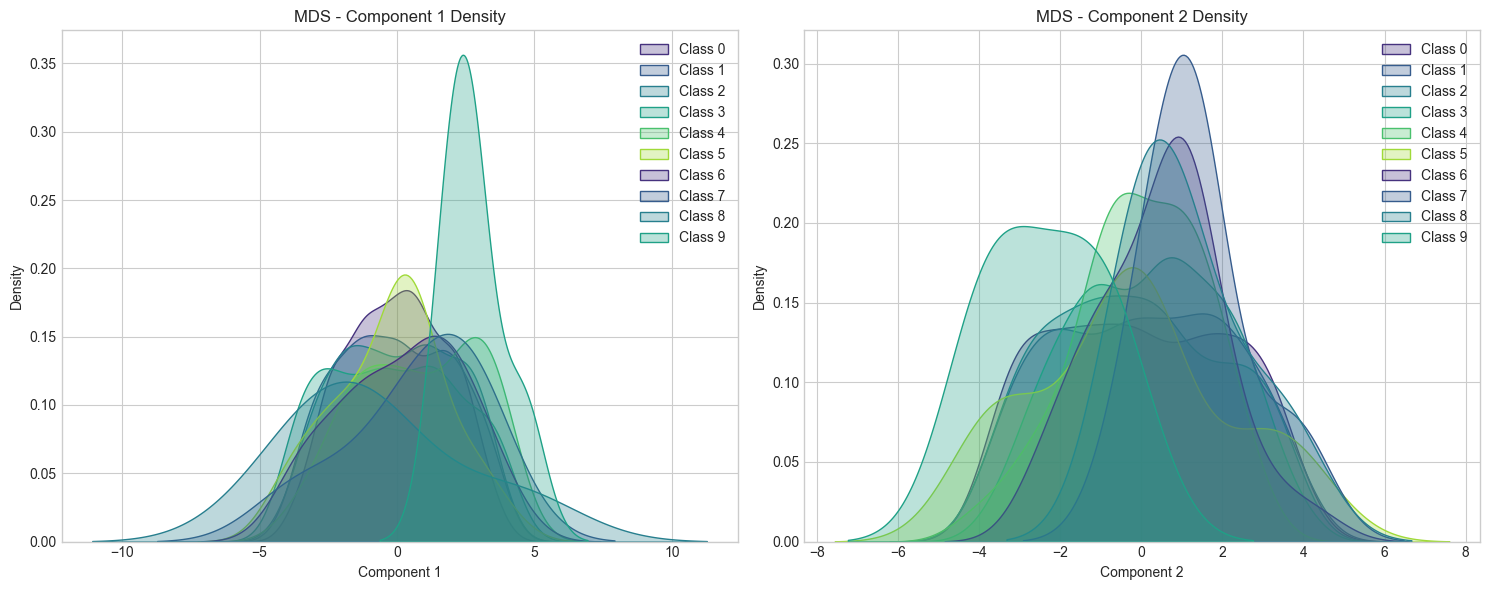

In [7]:
# Apply MDS
X_mds = dr.mds(X)

# Evaluate MDS
trust_mds = metrics.trustworthiness(X, X_mds)
cont_mds = metrics.continuity(X, X_mds)
knn_acc_mds = metrics.knn_accuracy(X_mds, y)
sil_score_mds = metrics.silhouette_score(X_mds, y)

print(f"MDS Metrics:")
print(f"Trustworthiness: {trust_mds:.4f}")
print(f"Continuity: {cont_mds:.4f}")
print(f"KNN Accuracy: {knn_acc_mds:.4f}")
print(f"Silhouette Score: {sil_score_mds:.4f}")

# Visualize MDS results
metrics.visualize(X_mds, y, title="MDS Visualization")

# Plot density distribution
plot_density_distribution(X_mds, y, "MDS")

## 5. Isomap

Isomap Metrics:
Trustworthiness: 0.6612
Continuity: 0.8035
KNN Accuracy: 0.2568
Silhouette Score: -0.3014


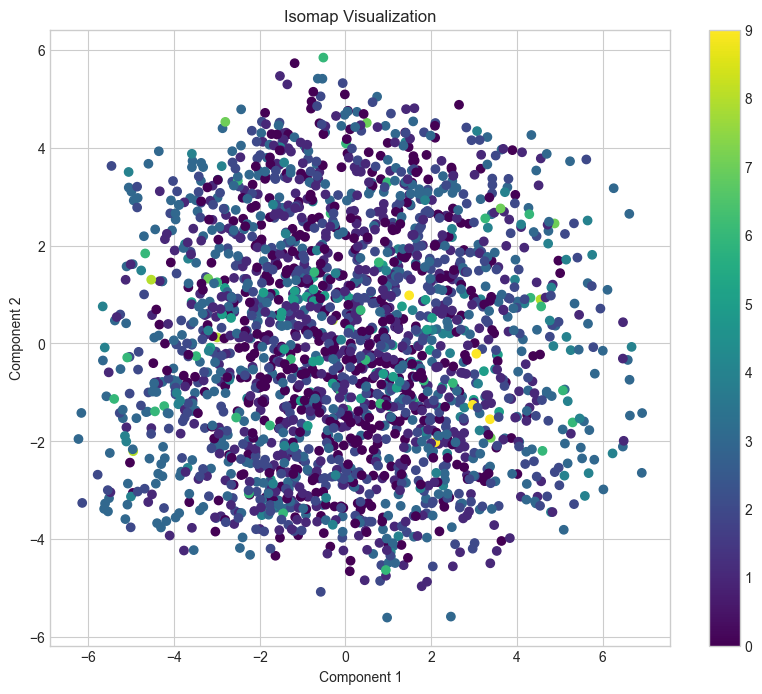

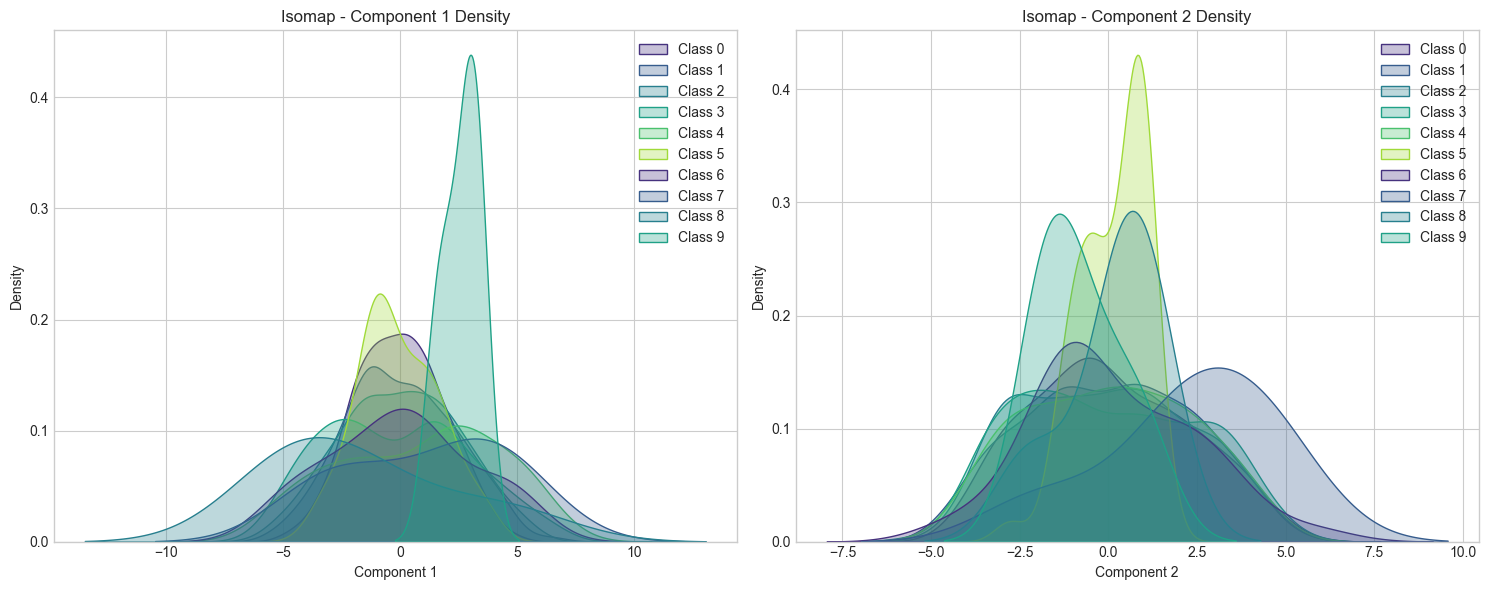

In [8]:
# Apply Isomap
X_isomap = dr.isomap(X, n_neighbors=5)

# Evaluate Isomap
trust_isomap = metrics.trustworthiness(X, X_isomap)
cont_isomap = metrics.continuity(X, X_isomap)
knn_acc_isomap = metrics.knn_accuracy(X_isomap, y)
sil_score_isomap = metrics.silhouette_score(X_isomap, y)

print(f"Isomap Metrics:")
print(f"Trustworthiness: {trust_isomap:.4f}")
print(f"Continuity: {cont_isomap:.4f}")
print(f"KNN Accuracy: {knn_acc_isomap:.4f}")
print(f"Silhouette Score: {sil_score_isomap:.4f}")

# Visualize Isomap results
metrics.visualize(X_isomap, y, title="Isomap Visualization")

# Plot density distribution
plot_density_distribution(X_isomap, y, "Isomap")

## 6. Independent Component Analysis (ICA)

ICA Metrics:
Trustworthiness: 0.6707
Continuity: 0.8166
KNN Accuracy: 0.2886
Silhouette Score: -0.3236


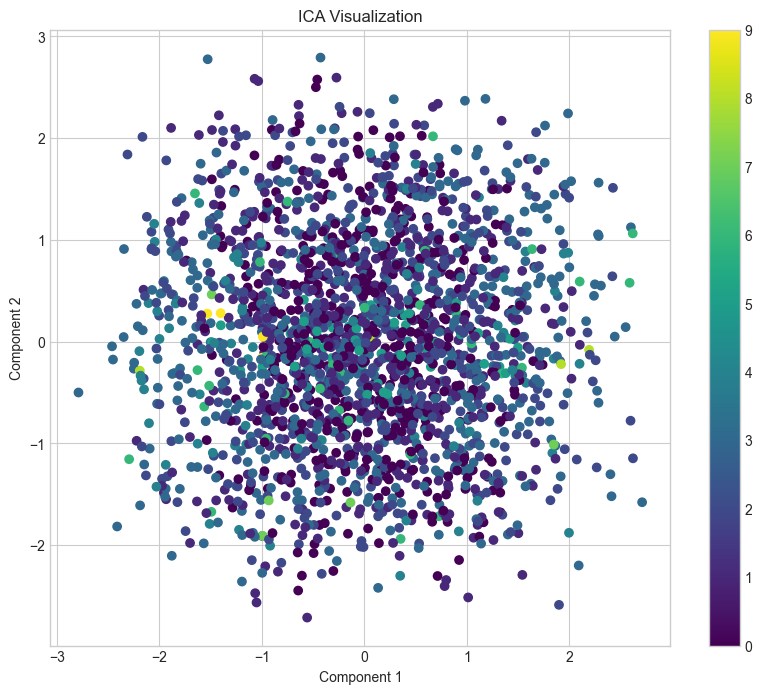

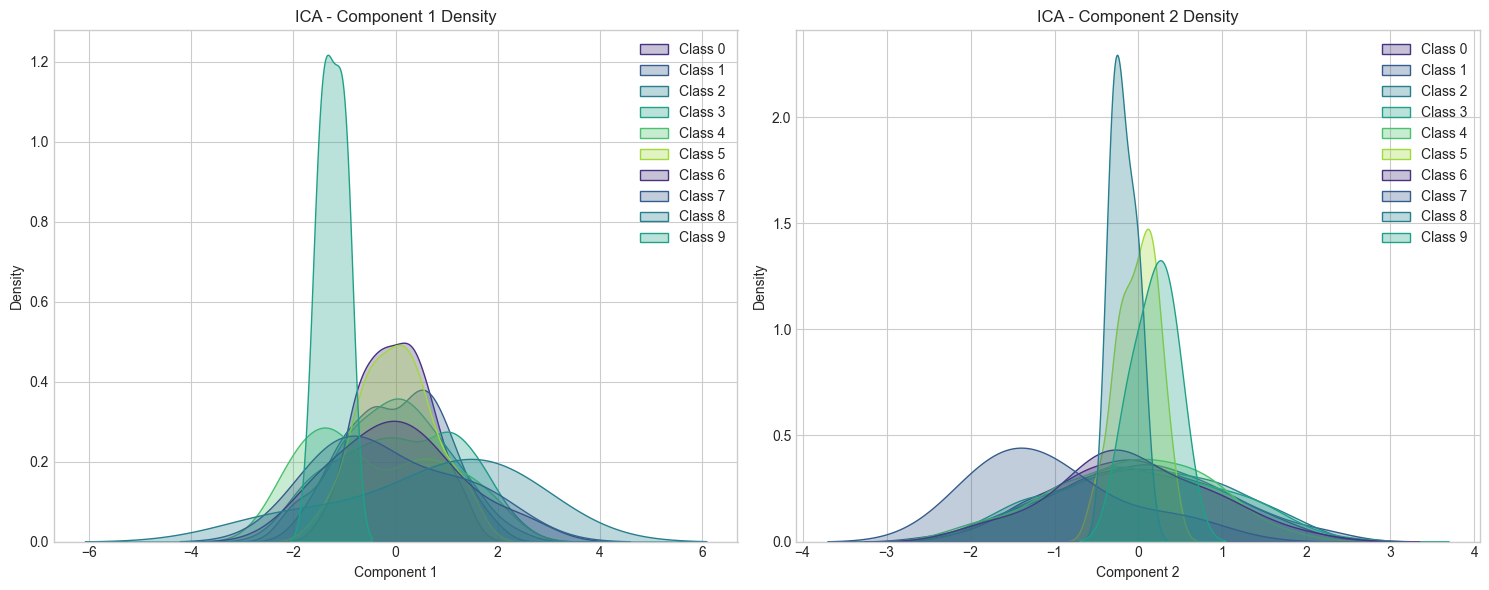

In [9]:
# Apply ICA
X_ica = dr.ica(X)

# Evaluate ICA
trust_ica = metrics.trustworthiness(X, X_ica)
cont_ica = metrics.continuity(X, X_ica)
knn_acc_ica = metrics.knn_accuracy(X_ica, y)
sil_score_ica = metrics.silhouette_score(X_ica, y)

print(f"ICA Metrics:")
print(f"Trustworthiness: {trust_ica:.4f}")
print(f"Continuity: {cont_ica:.4f}")
print(f"KNN Accuracy: {knn_acc_ica:.4f}")
print(f"Silhouette Score: {sil_score_ica:.4f}")

# Visualize ICA results
metrics.visualize(X_ica, y, title="ICA Visualization")

# Plot density distribution
plot_density_distribution(X_ica, y, "ICA")

## 7. Self-Organizing Maps (SOM)

SOM Metrics:
Trustworthiness: 0.9090
Continuity: 0.6474
KNN Accuracy: 0.2614
Silhouette Score: -0.1645


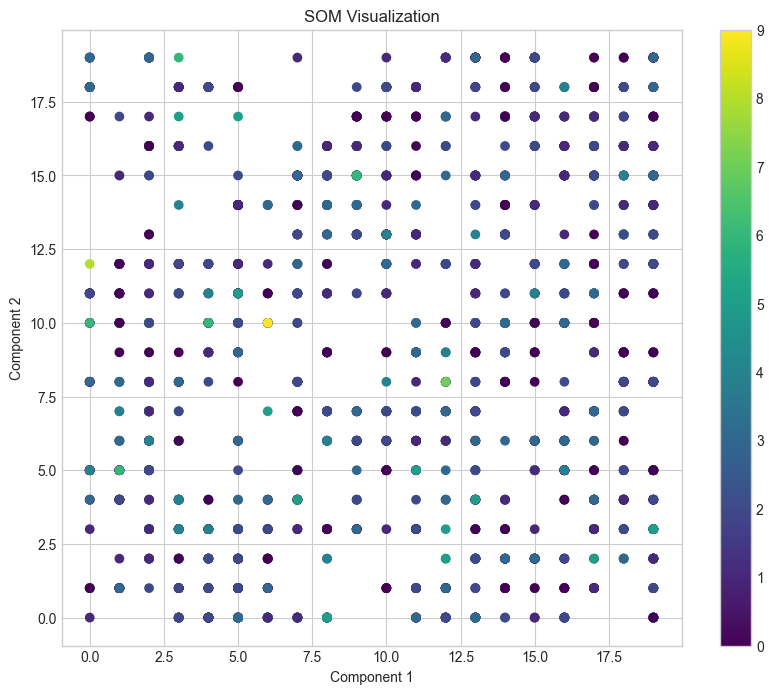

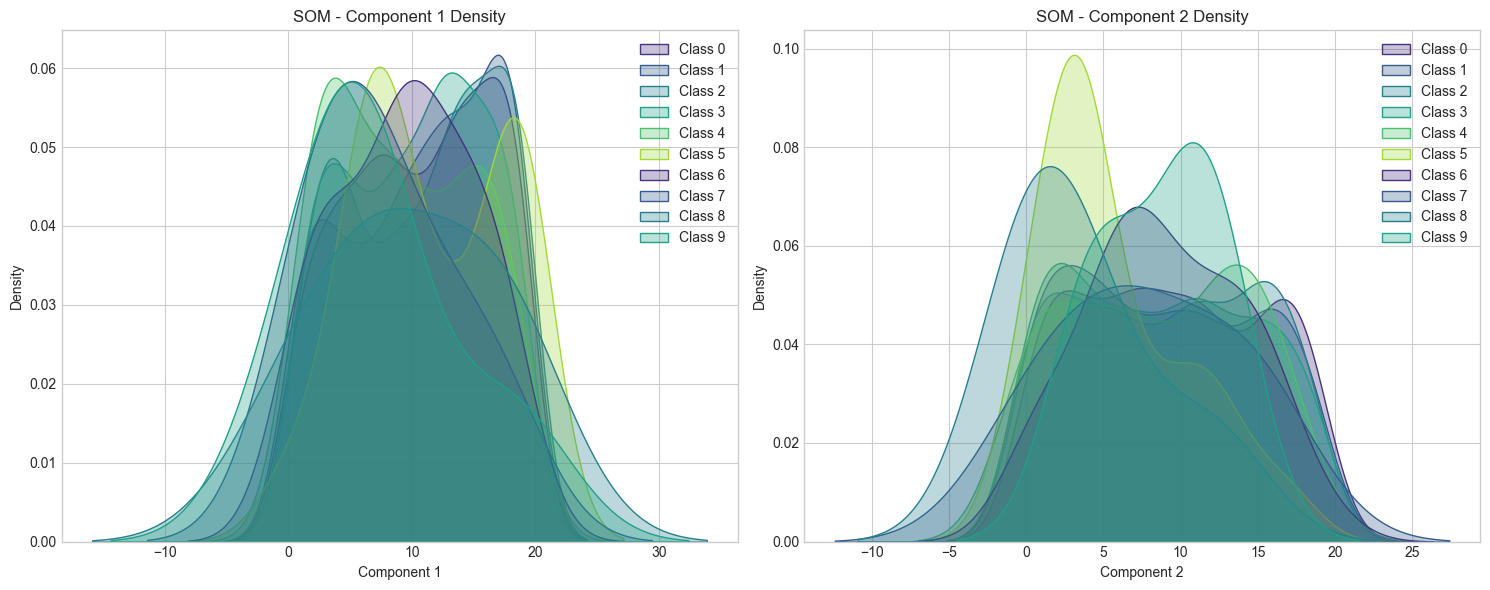

In [10]:
# Apply SOM
X_som = dr.som(X, grid_size=(20, 20))

# Evaluate SOM
trust_som = metrics.trustworthiness(X, X_som)
cont_som = metrics.continuity(X, X_som)
knn_acc_som = metrics.knn_accuracy(X_som, y)
sil_score_som = metrics.silhouette_score(X_som, y)

print(f"SOM Metrics:")
print(f"Trustworthiness: {trust_som:.4f}")
print(f"Continuity: {cont_som:.4f}")
print(f"KNN Accuracy: {knn_acc_som:.4f}")
print(f"Silhouette Score: {sil_score_som:.4f}")

# Visualize SOM results
metrics.visualize(X_som, y, title="SOM Visualization")

# Plot density distribution
plot_density_distribution(X_som, y, "SOM")

## 8. Genetic Algorithm PCA (GA-PCA)

GA-PCA Metrics:
Trustworthiness: 0.6836
Continuity: 0.8413
KNN Accuracy: 0.2568
Silhouette Score: -0.1902


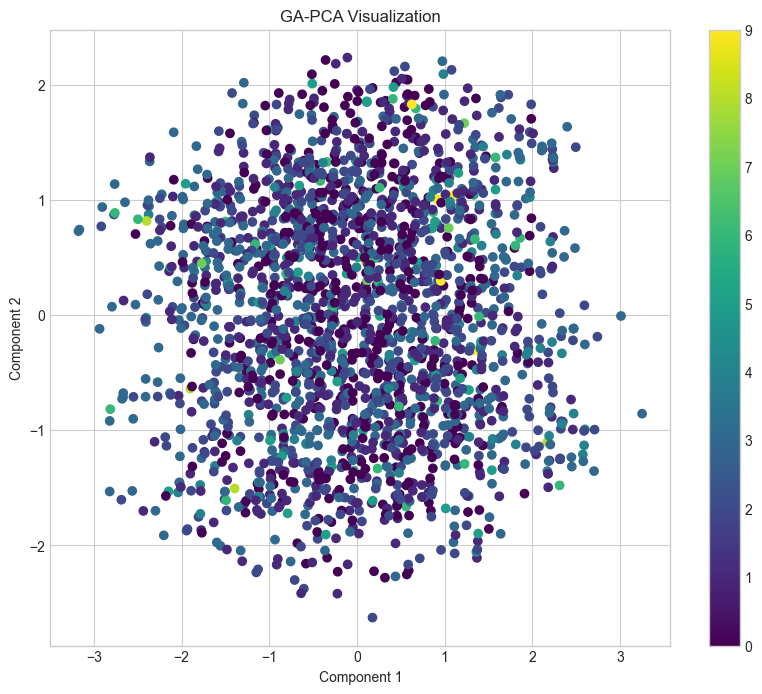

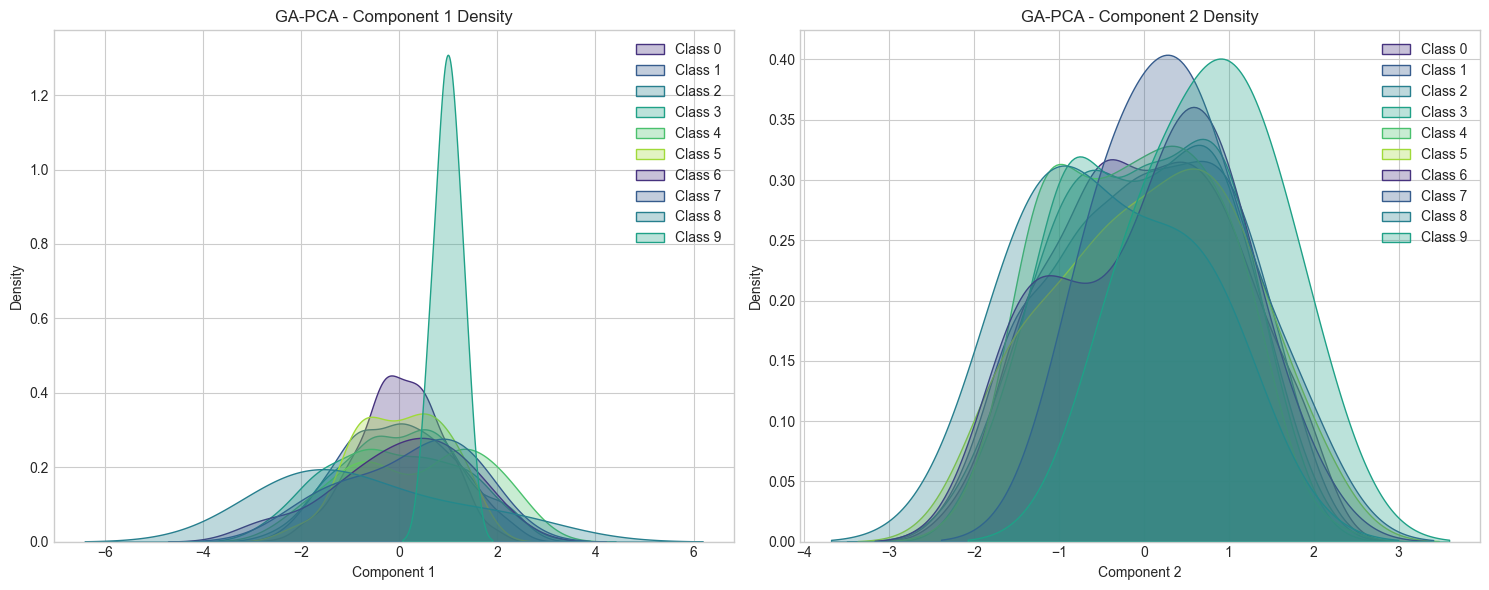

In [11]:
# Apply GA-PCA (with smaller parameters for demonstration)
X_ga_pca = dr.ga_pca(X, y, population_size=20, generations=20, mutation_rate=0.1)

# Evaluate GA-PCA
trust_ga_pca = metrics.trustworthiness(X, X_ga_pca)
cont_ga_pca = metrics.continuity(X, X_ga_pca)
knn_acc_ga_pca = metrics.knn_accuracy(X_ga_pca, y)
sil_score_ga_pca = metrics.silhouette_score(X_ga_pca, y)

print(f"GA-PCA Metrics:")
print(f"Trustworthiness: {trust_ga_pca:.4f}")
print(f"Continuity: {cont_ga_pca:.4f}")
print(f"KNN Accuracy: {knn_acc_ga_pca:.4f}")
print(f"Silhouette Score: {sil_score_ga_pca:.4f}")

# Visualize GA-PCA results
metrics.visualize(X_ga_pca, y, title="GA-PCA Visualization")

# Plot density distribution
plot_density_distribution(X_ga_pca, y, "GA-PCA")

## 9. Artificial Bee Colony Projection (ABC)

ABC Metrics:
Trustworthiness: 0.6631
Continuity: 0.7903
KNN Accuracy: 0.2795
Silhouette Score: -0.2100


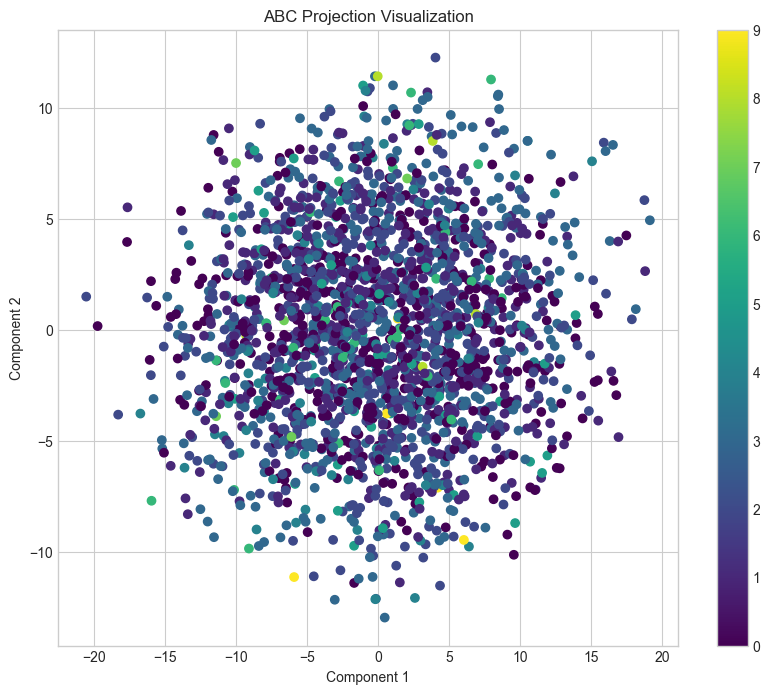

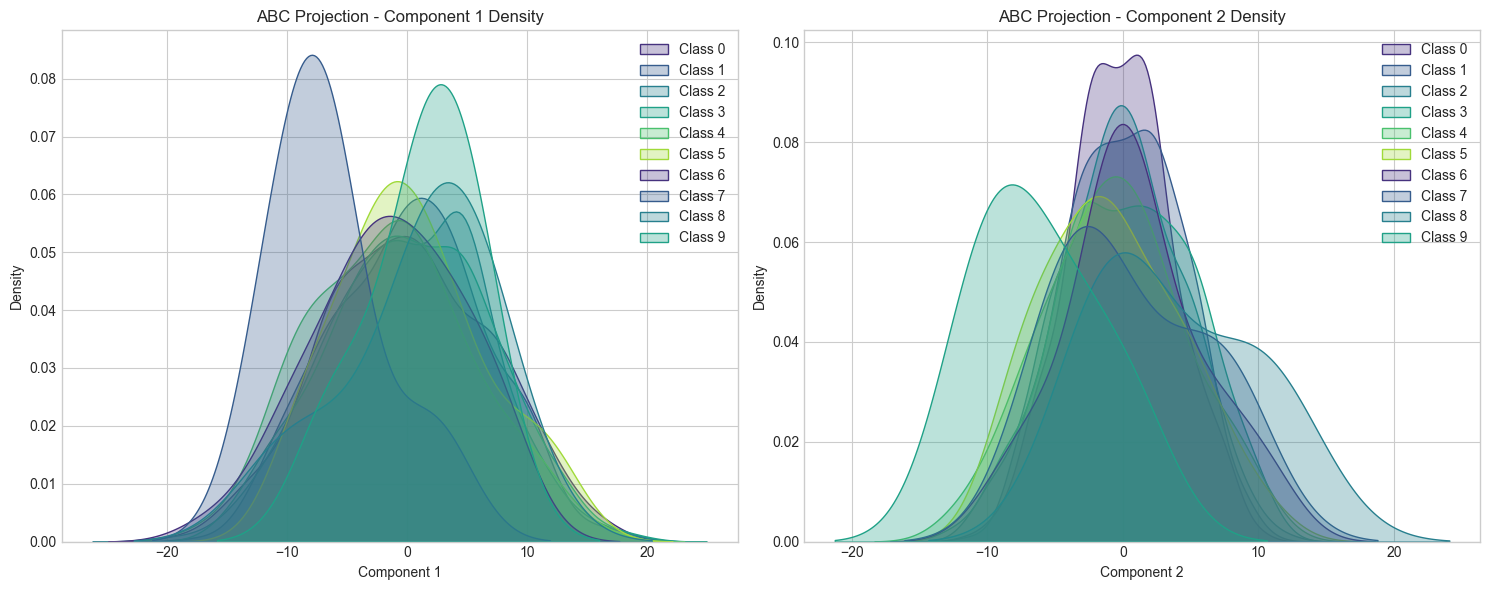

In [12]:
# Apply ABC (with smaller parameters for demonstration)
X_abc = dr.abc_projection(X, y, n_bees=20, n_iterations=20, limit=5)

# Evaluate ABC
trust_abc = metrics.trustworthiness(X, X_abc)
cont_abc = metrics.continuity(X, X_abc)
knn_acc_abc = metrics.knn_accuracy(X_abc, y)
sil_score_abc = metrics.silhouette_score(X_abc, y)

print(f"ABC Metrics:")
print(f"Trustworthiness: {trust_abc:.4f}")
print(f"Continuity: {cont_abc:.4f}")
print(f"KNN Accuracy: {knn_acc_abc:.4f}")
print(f"Silhouette Score: {sil_score_abc:.4f}")

# Visualize ABC results
metrics.visualize(X_abc, y, title="ABC Projection Visualization")

# Plot density distribution
plot_density_distribution(X_abc, y, "ABC Projection")

## 10. Ant Colony Optimization (ACO) Feature Selection

ACO Metrics:
Trustworthiness: 0.7721
Continuity: 0.9502
KNN Accuracy: 0.3068
Silhouette Score: -0.1652


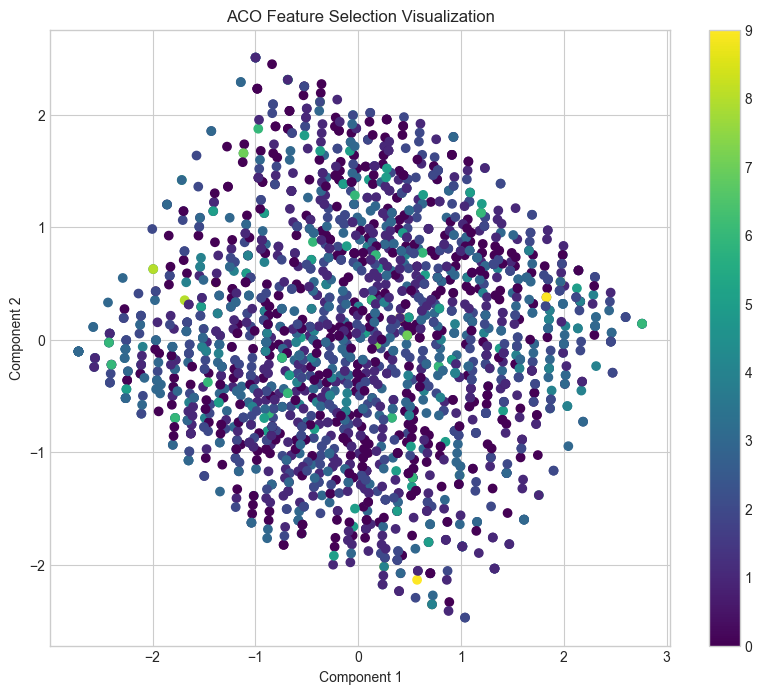

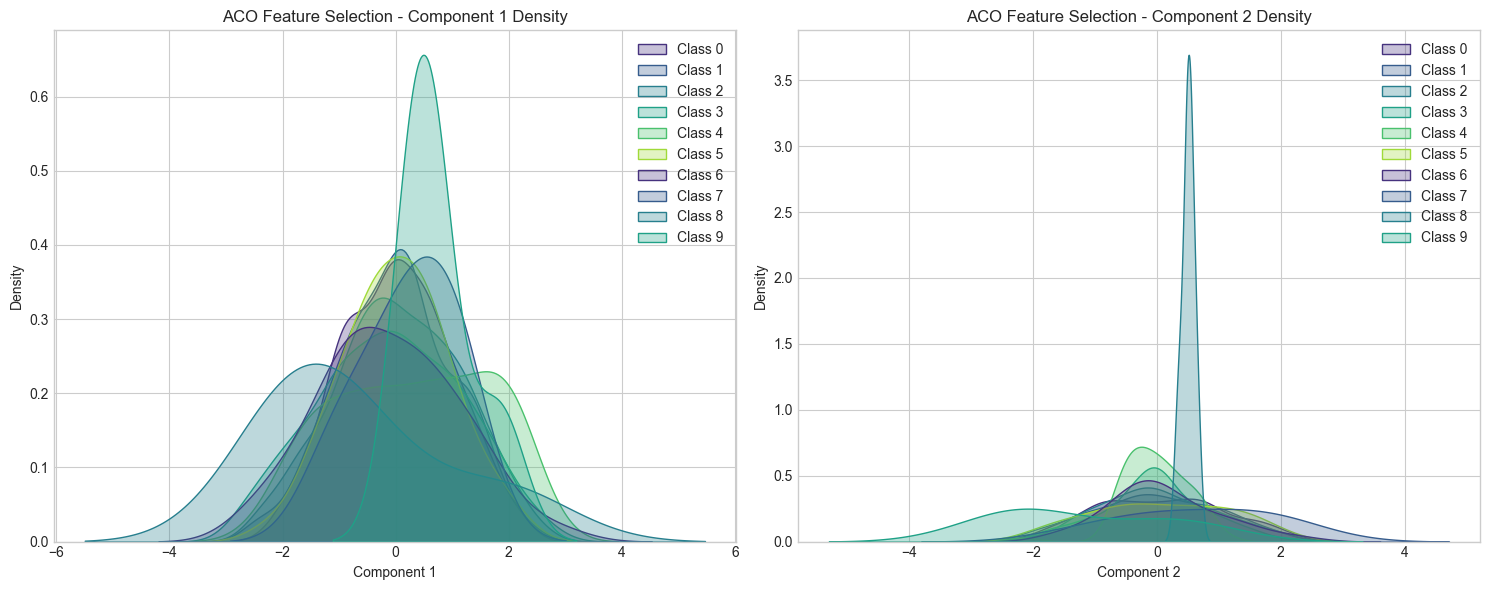

In [13]:
# Apply ACO (with smaller parameters for demonstration)
X_aco = dr.aco_feature_selection(X, y, n_ants=20, n_iterations=20, alpha=1, beta=2, rho=0.1)

# Evaluate ACO
trust_aco = metrics.trustworthiness(X, X_aco)
cont_aco = metrics.continuity(X, X_aco)
knn_acc_aco = metrics.knn_accuracy(X_aco, y)
sil_score_aco = metrics.silhouette_score(X_aco, y)

print(f"ACO Metrics:")
print(f"Trustworthiness: {trust_aco:.4f}")
print(f"Continuity: {cont_aco:.4f}")
print(f"KNN Accuracy: {knn_acc_aco:.4f}")
print(f"Silhouette Score: {sil_score_aco:.4f}")

# Visualize ACO results
metrics.visualize(X_aco, y, title="ACO Feature Selection Visualization")

# Plot density distribution
plot_density_distribution(X_aco, y, "ACO Feature Selection")

## 11. Particle Swarm Optimization (PSO) Projection

PSO Metrics:
Trustworthiness: 0.6579
Continuity: 0.8087
KNN Accuracy: 0.3114
Silhouette Score: -0.1528


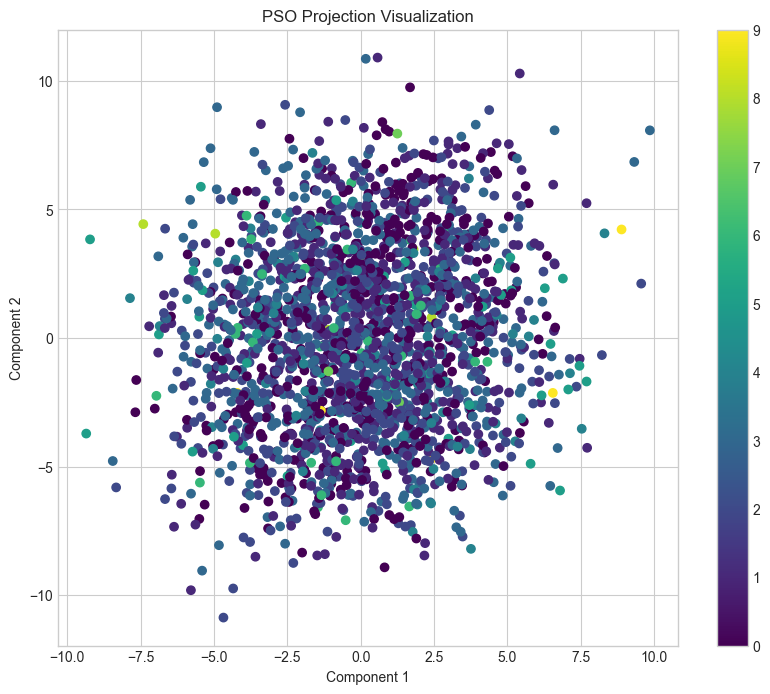

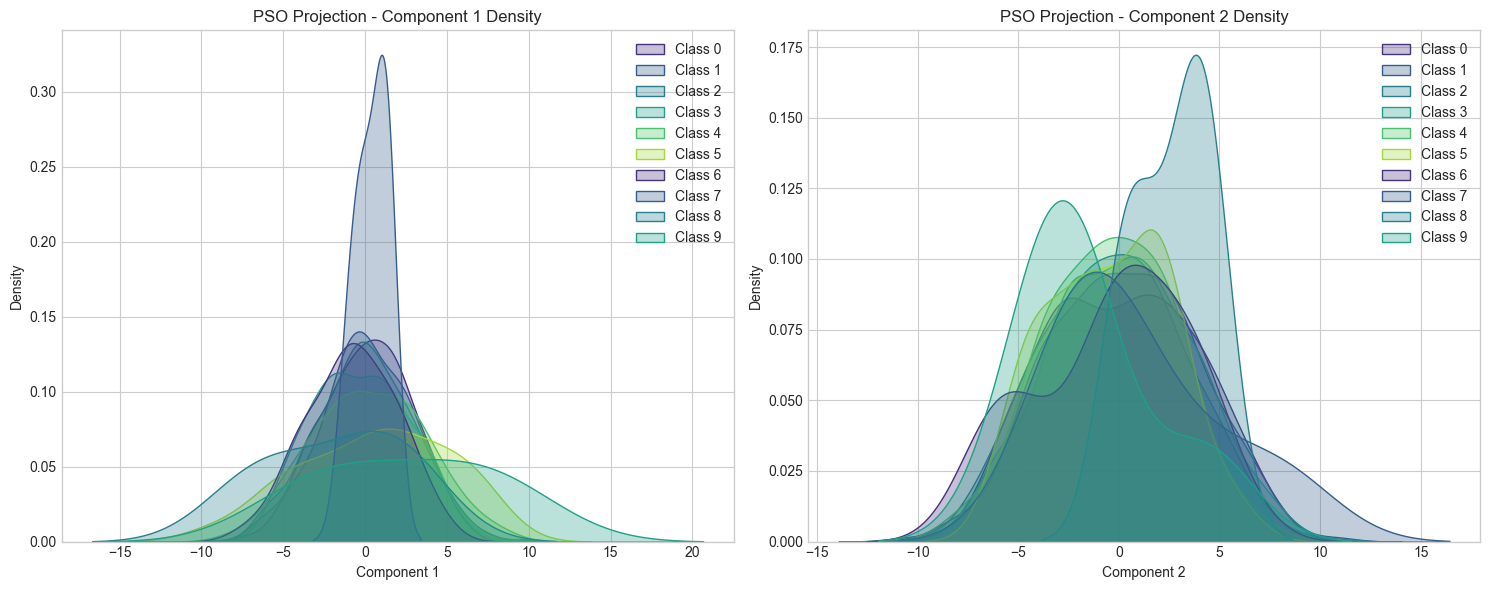

In [14]:
# Apply PSO (with smaller parameters for demonstration)
X_pso = dr.pso_projection(X, y, n_particles=20, n_iterations=20, w=0.7, c1=1.5, c2=1.5)

# Evaluate PSO
trust_pso = metrics.trustworthiness(X, X_pso)
cont_pso = metrics.continuity(X, X_pso)
knn_acc_pso = metrics.knn_accuracy(X_pso, y)
sil_score_pso = metrics.silhouette_score(X_pso, y)

print(f"PSO Metrics:")
print(f"Trustworthiness: {trust_pso:.4f}")
print(f"Continuity: {cont_pso:.4f}")
print(f"KNN Accuracy: {knn_acc_pso:.4f}")
print(f"Silhouette Score: {sil_score_pso:.4f}")

# Visualize PSO results
metrics.visualize(X_pso, y, title="PSO Projection Visualization")

# Plot density distribution
plot_density_distribution(X_pso, y, "PSO Projection")

## Comparison of all techniques

In [15]:
techniques = ['PCA', 'LDA', 't-SNE', 'MDS', 'Isomap', 'ICA', 'SOM', 'GA-PCA', 'ABC', 'ACO', 'PSO']
trustworthiness = [trust_pca, trust_lda, trust_tsne, trust_mds, trust_isomap, trust_ica, 
                  trust_som, trust_ga_pca, trust_abc, trust_aco, trust_pso]
continuity = [cont_pca, cont_lda, cont_tsne, cont_mds, cont_isomap, cont_ica, 
             cont_som, cont_ga_pca, cont_abc, cont_aco, cont_pso]
knn_accuracy = [knn_acc_pca, knn_acc_lda, knn_acc_tsne, knn_acc_mds, knn_acc_isomap, knn_acc_ica, 
               knn_acc_som, knn_acc_ga_pca, knn_acc_abc, knn_acc_aco, knn_acc_pso]
silhouette = [sil_score_pca, sil_score_lda, sil_score_tsne, sil_score_mds, sil_score_isomap, sil_score_ica, 
             sil_score_som, sil_score_ga_pca, sil_score_abc, sil_score_aco, sil_score_pso]

# Create a DataFrame
results_df = pd.DataFrame({
    'Technique': techniques,
    'Trustworthiness': trustworthiness,
    'Continuity': continuity,
    'KNN Accuracy': knn_accuracy,
    'Silhouette Score': silhouette
})

# Display the results
results_df

Technique  Trustworthiness  Continuity  KNN Accuracy  Silhouette Score
0        PCA         0.671053    0.830169      0.288636         -0.317439
1        LDA         0.680484    0.821811      0.238636         -0.234214
2      t-SNE         0.953421    0.797232      0.240909         -0.208627
3        MDS         0.692938    0.821000      0.254545         -0.224907
4     Isomap         0.661204    0.803486      0.256818         -0.301404
5        ICA         0.670709    0.816645      0.288636         -0.323564
6        SOM         0.908958    0.647437      0.261364         -0.164526
7     GA-PCA         0.683619    0.841345      0.256818         -0.190215
8        ABC         0.663143    0.790252      0.279545         -0.209951
9        ACO         0.772078    0.950229      0.306818         -0.165209
10       PSO         0.657882    0.808691      0.311364         -0.152755

C:\Users\LapTop\AppData\Local\Temp\ipykernel_13848\2574614259.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
C:\Users\LapTop\AppData\Local\Temp\ipykernel_13848\2574614259.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
C:\Users\LapTop\AppData\Local\Temp\ipykernel_13848\2574614259.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
C:\Users\LapTop\AppData\Local\Temp\ipykernel_13848\2574614259.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xti

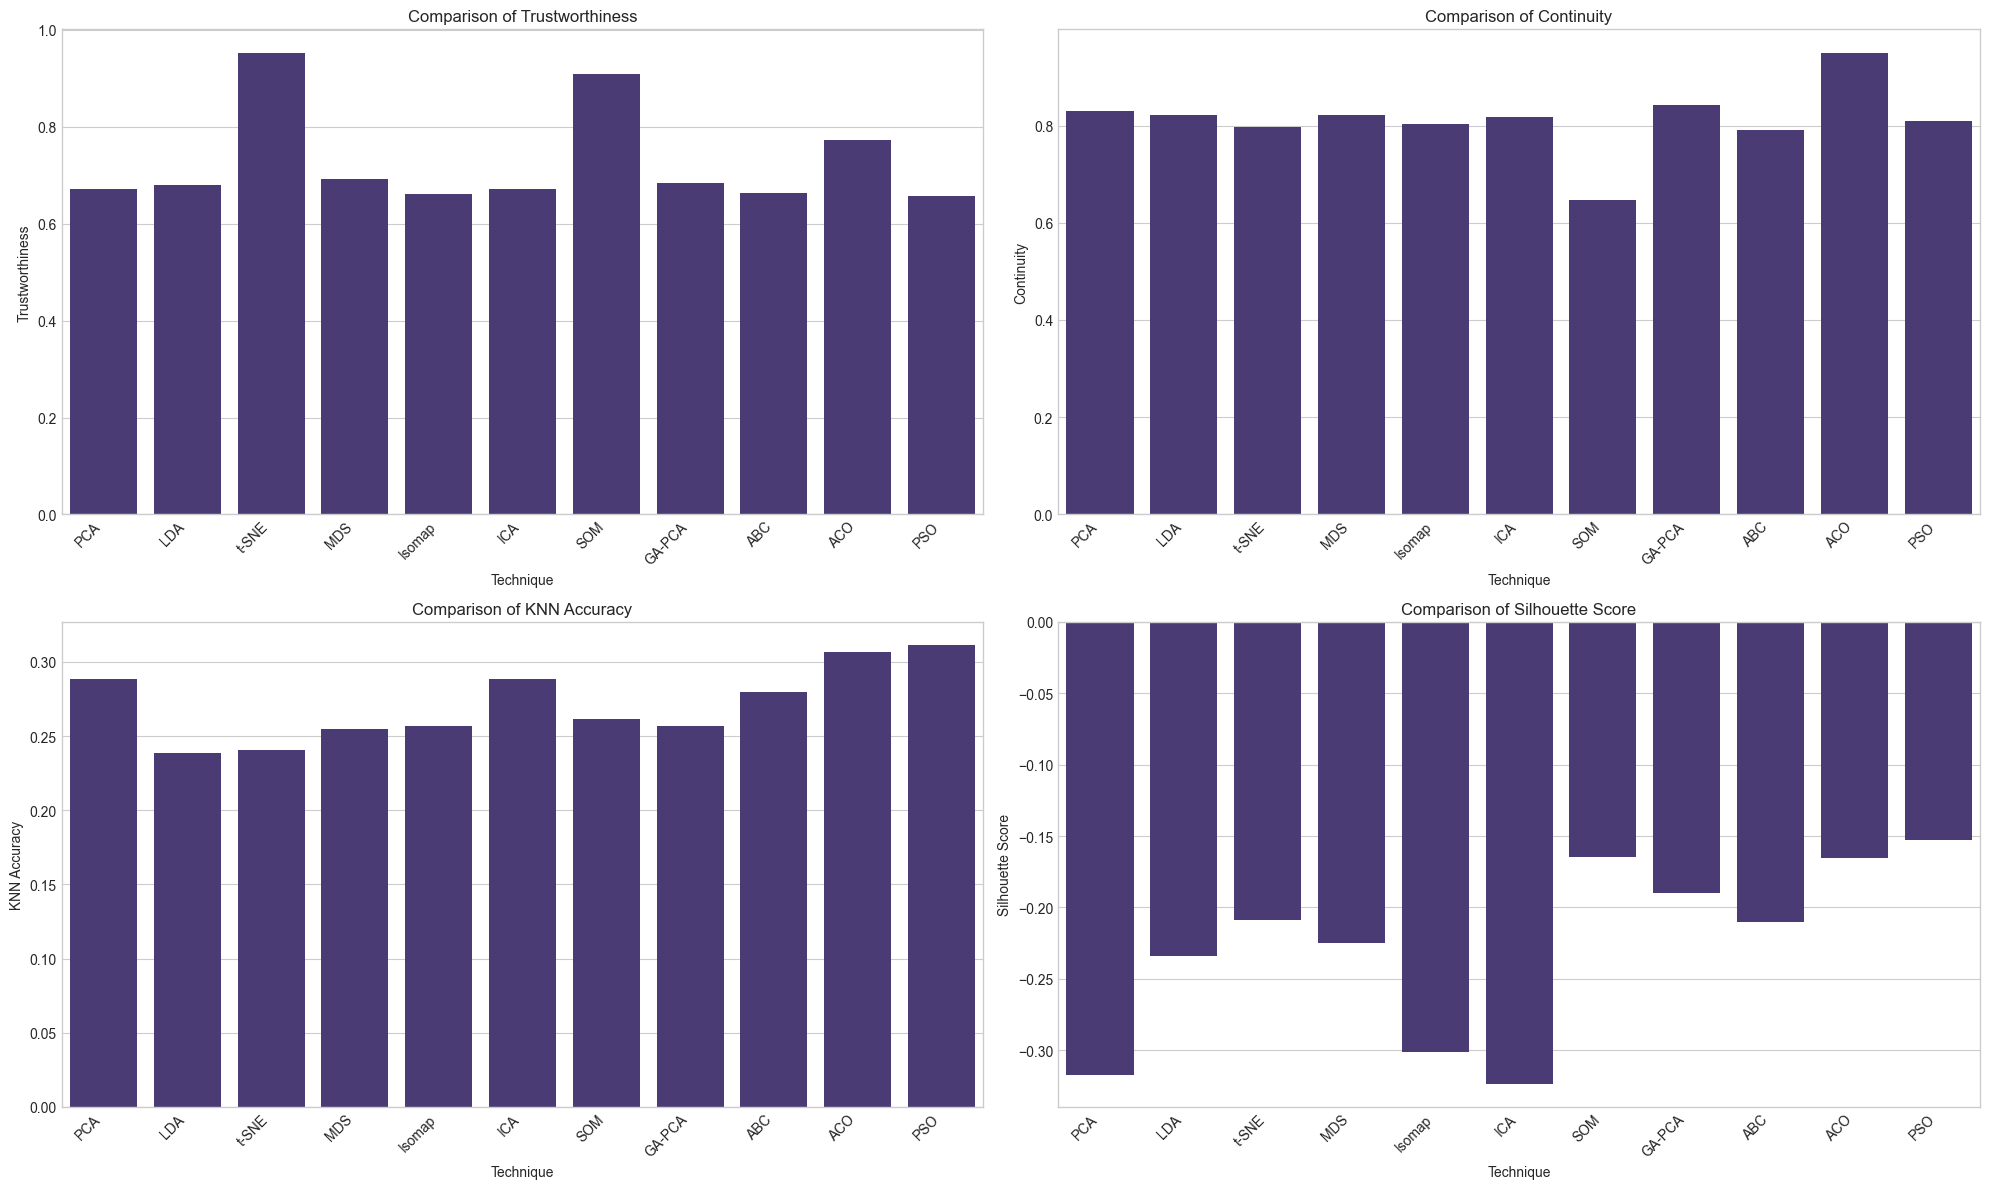

In [16]:
fig, axes = plt.subplots(2, 2, figsize=(20, 12))
metrics_to_plot = ['Trustworthiness', 'Continuity', 'KNN Accuracy', 'Silhouette Score']

for i, metric in enumerate(metrics_to_plot):
    ax = axes[i//2, i%2]
    sns.barplot(x='Technique', y=metric, data=results_df, ax=ax)
    ax.set_title(f'Comparison of {metric}')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    
plt.tight_layout()
plt.show()

Fitting 3 folds for each of 20 candidates, totalling 60 fits
0:	learn: 1.9895255	total: 17.9ms	remaining: 3.56s
100:	learn: 0.9545220	total: 1.54s	remaining: 1.51s
199:	learn: 0.9281876	total: 3.07s	remaining: 0us
0:	learn: 1.9895255	total: 13.1ms	remaining: 2.61s
100:	learn: 0.9545220	total: 1.23s	remaining: 1.2s
199:	learn: 0.9281876	total: 2.98s	remaining: 0us
CatBoost (PCA) Accuracy: 0.5305

Classification Report:


c:\Users\LapTop\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\LapTop\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\LapTop\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

              precision    recall  f1-score   support

           0       0.54      0.83      0.65    501209
           1       0.49      0.28      0.35    422498
           2       0.00      0.00      0.00     47622
           3       0.00      0.00      0.00     21121
           4       0.00      0.00      0.00      3885
           5       0.00      0.00      0.00      1996
           6       0.00      0.00      0.00      1424
           7       0.00      0.00      0.00       230
           8       0.00      0.00      0.00        12
           9       0.00      0.00      0.00         3

    accuracy                           0.53   1000000
   macro avg       0.10      0.11      0.10   1000000
weighted avg       0.48      0.53      0.48   1000000

PCA Component ranking:
PC7: 14.1898
PC4: 13.9048
PC3: 13.2925
PC5: 13.1578
PC8: 12.1451
PC6: 11.8043
PC1: 11.2690
PC2: 10.2366


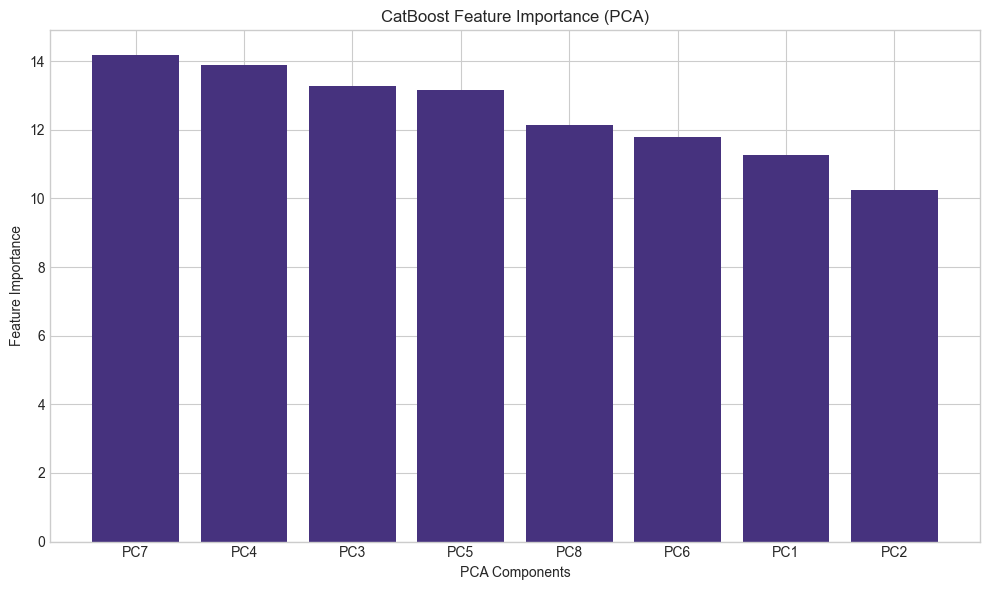

In [24]:
from catboost import CatBoostClassifier, Pool

# Define the CatBoost model
cat_model = CatBoostClassifier(
    iterations=100,
    learning_rate=0.1,
    depth=6,
    loss_function='MultiClass',
    random_seed=42,
    verbose=100
)

# Parameter grid for hyperparameter tuning
cat_param_grid = {
    'iterations': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'depth': [4, 6, 8],
    'l2_leaf_reg': [1, 3, 5, 7],
    'border_count': [32, 64, 128]
}


cat_search = RandomizedSearchCV(
    estimator=cat_model,
    param_distributions=cat_param_grid,
    n_iter=20,
    cv=3,
    random_state=42,
    n_jobs=-1,
    verbose=1
)
cat_search.fit(X_train_pca, y_train)
cat_model = cat_search.best_estimator_

# After PCA transformation, there are no categorical features
# Train the model on PCA-transformed data
cat_model.fit(X_train_pca, y_train)

# Make predictions
y_pred_cat = cat_model.predict(X_test_pca)

# Evaluate
cat_accuracy = accuracy_score(y_test, y_pred_cat)
print(f"CatBoost (PCA) Accuracy: {cat_accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_cat))

# Feature importance of PCA components
importance = cat_model.get_feature_importance()
indices = np.argsort(importance)[::-1]

print("PCA Component ranking:")
for f in range(len(pc_columns)):
    print(f"{pc_columns[indices[f]]}: {importance[indices[f]]:.4f}")

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.bar(range(len(importance)), importance[indices], align='center')
plt.xticks(range(len(importance)), [pc_columns[i] for i in indices])
plt.xlabel('PCA Components')
plt.ylabel('Feature Importance')
plt.title('CatBoost Feature Importance (PCA)')
plt.tight_layout()
plt.show()